# Inspect ScaleVarianceTask on all HSC coadd patches
We plot the ScaleVarianceTask correction factors on the HSC template patches.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler, DatasetRef
# from lsst.ip.diffim.getTemplate import GetCoaddAsTemplateConfig, GetCoaddAsTemplateTask
from astropy.visualization import ZScaleInterval
plt.rcParams['figure.figsize'] = (8.5, 5)
from lsst.pipe.tasks.scaleVariance import ScaleVarianceTask, ScaleVarianceConfig
import lsst.geom as lsstGeom
import numpy as np
from astropy.table import Table
from itertools import islice

In [5]:
# This query has duplicates
butler = Butler("/project/gkovacs/hsc_gen3repo/rc2w50_ssw02", collections='HSC/runs/RC2/w_2020_50', writeable=False)
coaddRefs = butler.registry.queryDatasets("deepCoadd", 
                                          dataId = {'band': 'g', 'tract':9813, 'skymap': "hsc_rings_v1"})
# Remove duplicates
coaddRefs = set(coaddRefs)

In [6]:
scaleConfig = ScaleVarianceConfig()

In [7]:
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in coaddRefs:
    singleP = butler.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
        x = [ cref.dataId['tract'], cref.dataId['patch'], scaleFactor.pixFactor, scaleFactor.imageFactor]
        R.append(x)
        print(x)
    except:
        print("Failed: ",cref.dataId['tract'], cref.dataId['patch'])
        pass

[9813, 31, 1.2059789702831316, 1.2116751966109272]
[9813, 22, 1.1939953724413273, 1.2028196647665301]
[9813, 37, 1.1642445045690681, 1.1819499930721955]
[9813, 50, 1.2046360998740664, 1.2147491589442838]
[9813, 17, 1.127419261669884, 1.0809674386343329]
[9813, 79, 1.1121896731945728, 1.2544821040821383]
[9813, 4, 1.156952111192872, 1.3523345155624884]
[9813, 11, 1.1459828176715428, 1.171193774587694]
[9813, 74, 1.1088165074288365, 0.7070096965731183]
[9813, 43, 1.1900625740456128, 1.194662773236788]
[9813, 38, 1.1834440017977552, 1.1835935172243917]
[9813, 61, 1.166456345094204, 1.1842032152440682]
[9813, 49, 1.2099482690260719, 1.2183321816554402]
[9813, 15, 1.1746402358381622, 1.2083437401585397]
[9813, 26, 1.1575124300146238, 1.2332510788884403]
[9813, 70, 1.1403939768957285, 1.2400462906955985]
[9813, 42, 1.2020771730100066, 1.205108650766234]
[9813, 77, 1.127992808074988, 1.1646349445728439]
[9813, 76, 1.1286993206876959, 1.1509303384069605]
[9813, 52, 1.1923991167273433, 1.195133

In [8]:
T = Table(names=['tract', 'patch', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


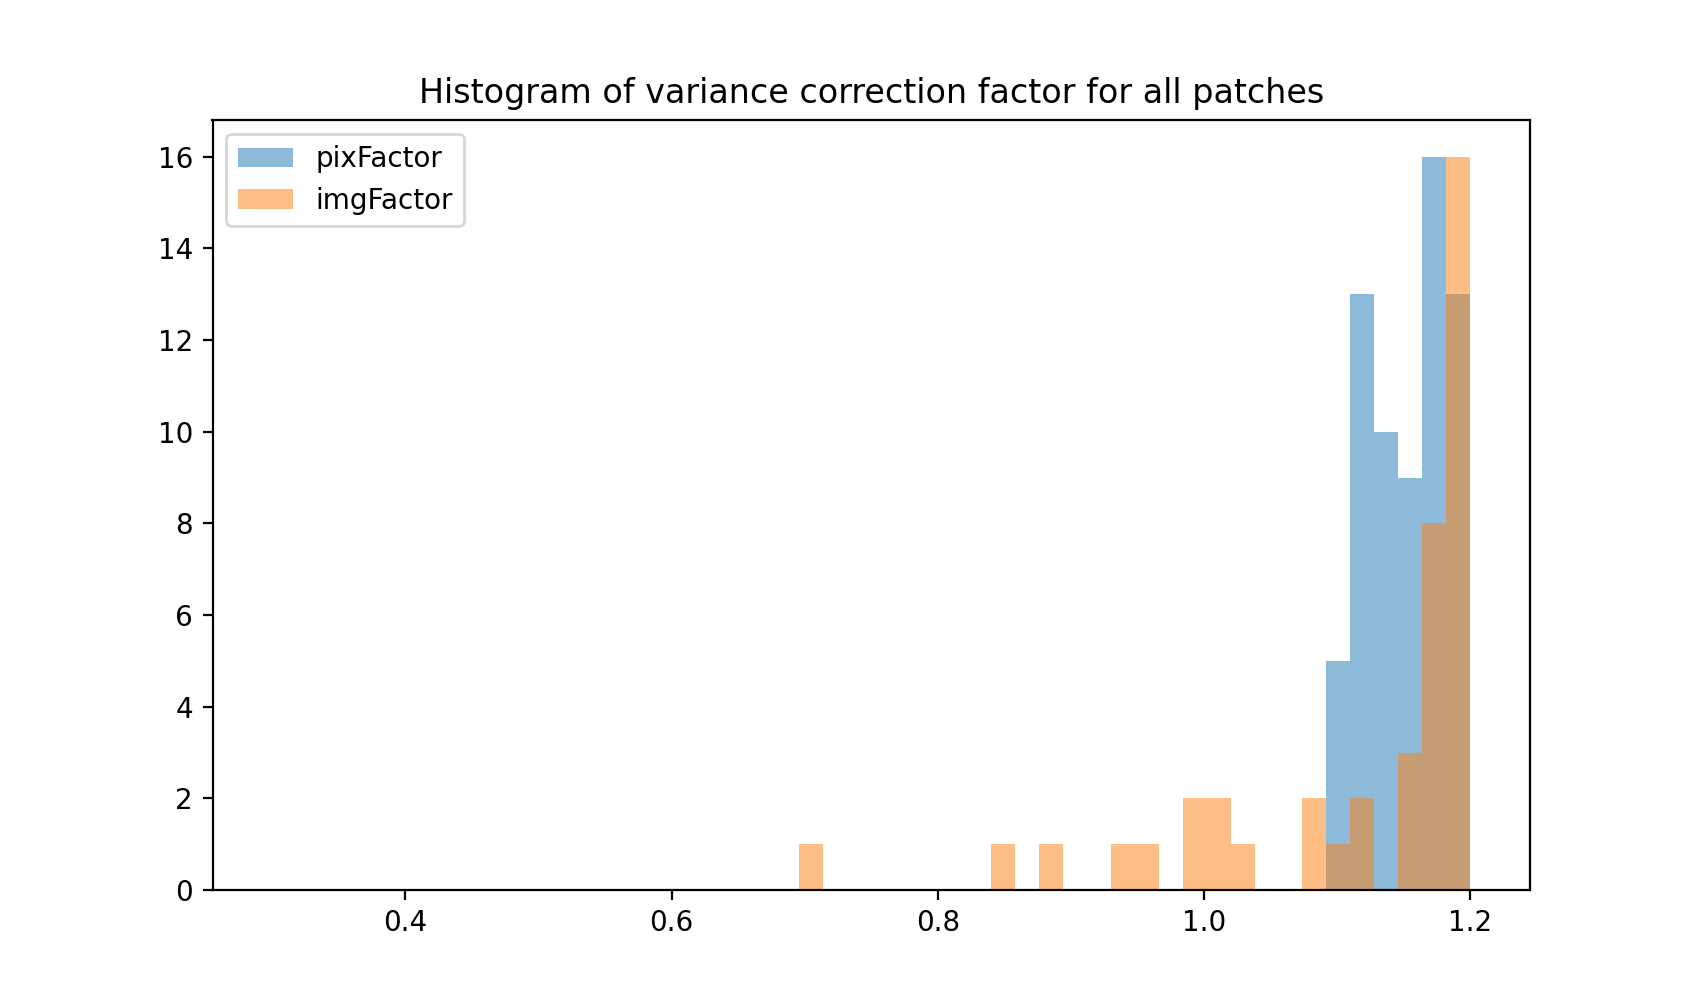

In [9]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of variance correction factor for all patches")
ax.legend()